# Preparing for the Analysis

## Imports

Import necessary packages for this analysis.

In [511]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

## Define Functions

Function to calculate vectorized cost:

In [512]:
def calcVectorizedCost(X,y,theta):
    return float(((X.dot(theta))-y).T.dot((X.dot(theta))-y))/(len(X))

Function to calculate gradient descent, and return optimal theta values as well as losses:

In [513]:
def gradientDescent(x, y, thetaInit, eta, epochs):
    
    """
    Caculating gradients and updating thetas through gradient descent loop
    
    x: independent variable
    y: dependent variable
    thetaInit: current weights (coefficients) for regression
    eta: learning rate
    epochs: number of steps for updating theta
    """
    
    # copy theta and initialize losses
    theta = np.copy(thetaInit)
    losses = []
    losses.append(calcVectorizedCost(x, y, theta))
    
    # run gradient descent loop
    for i in range(epochs):
        gradient = 2 * (x.T.dot(x.dot(theta) - y)) / x.shape[0]
        theta = theta - (eta * gradient)
        losses.append(calcVectorizedCost(x, y, theta))

    return theta, losses 

Function to predict values (in this case, the number of times a song will be played) using the theta matrix computed through gradient descent, and the inputted X values.

In [514]:
def predict(theta, x):
    return x.dot(theta)

## Load in Data

Read in data as a pandas dataframe, dropping the first column (which contains only id numbers), along with any non-numeric features (artist, track, etc.).

In [515]:
data = pd.read_csv("tracks2.csv")
data = data.drop(columns = ['Unnamed: 0', 'artist', 'track', 'spotify_id', 'time_signature', 'duration', 'key', 'mode'])

# add in column of ones, the bias
data.insert(0, 'Ones', 1)
data

,Ones,plays,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,1,0.397,0.242,-10.754,0.0663,0.84800,0.000000,0.1060,0.144,171.747
1,1,1,0.781,0.814,-3.315,0.0648,0.05860,0.000000,0.1180,0.782,92.037
2,1,3,0.581,0.876,-4.959,0.1770,0.25300,0.000003,0.2810,0.767,156.050
3,1,1,0.931,0.387,-9.127,0.4120,0.08800,0.000000,0.1360,0.376,125.978
4,1,2,0.694,0.625,-8.753,0.0252,0.12200,0.025000,0.0789,0.469,108.133
...,...,...,...,...,...,...,...,...,...,...,...
1046,1,1,0.510,0.530,-6.593,0.0464,0.00252,0.000642,0.2240,0.357,164.020
1047,1,4,0.684,0.473,-6.434,0.0427,0.00449,0.000552,0.3370,0.299,81.004
1048,1,1,0.842,0.522,-7.844,0.0985,0.29300,0.000069,0.1070,0.285,132.986
1049,1,2,0.321,0.429,-7.073,0.0302,0.72400,0.000091,0.0606,0.174,123.419


# Performing Linear Regression Analysis

The purpose of this analysis is to create a linear regression model from this dataset which can predict the number of times the given user will play a song based on its characteristics. Based on this predicted number of plays and a set cutoff, we can determine whether the user will "like" or "dislike" the track, and in turn whether or not it should be recommended to the user.

## Splitting the Data

Begin by randomly shuffling dataset and splitting the data into training and testing using holdout method (in future, maybe try 10-Fold Cross Validation)

In [516]:
X = data.drop(columns = 'plays')
y = data['plays']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vectorize:

In [517]:
X_train = np.matrix(X_train)
y_train = np.matrix(y_train).T

X_test = np.matrix(X_test)
y_test = np.matrix(y_test).T

## Gradient Descent

Initialize theta (a vector of zeros):

In [518]:
thetaInit = np.zeros((X_train.shape[1],1))

Calculate vectorized cost using this initial theta vector. Using gradient descent, we hope to achieve losses lower than this value.


In [519]:
calcVectorizedCost(X_train, y_train, thetaInit)

25.310714285714287

Run gradient descent algorithm, and print out the optimal theta vector as well as the (hopefully reduced) cost of using this theta vector. This may take a few seconds to run.

In [520]:
eta = 1 * 10**(-8)
epochs = 10000

theta, losses = gradientDescent(X_train, y_train, thetaInit, eta, epochs)

print("Optimal theta:", theta)
print("Cost", losses[-1])

Optimal theta: [[ 2.00423807e-04]
 [ 1.30503011e-04]
 [ 1.13830616e-04]
 [-1.37077376e-03]
 [ 1.72796300e-05]
 [ 5.65829793e-05]
 [-3.09699317e-08]
 [ 3.56667022e-05]
 [ 9.97345547e-05]
 [ 2.19139358e-02]]
Cost 17.164661987578366


The cost is lower, meaning these are the optimal values for theta at this point.

## Determine Cutoff Value

Gather predictions using the model created above, and determine the cutoff value for liked/disliked tracks (this value will be the first quartile).

In [521]:
predictions = predict(theta, X_test)
for i in range(5):
    print(predictions[i])

print(' . . . ')

for i in range(1, 6):
    print(predictions[-i])
    
    
predDF = pd.DataFrame(predictions)

[[3.78385283]]
[[3.81414001]]
[[2.85501735]]
[[2.53683593]]
[[3.84508114]]
 . . . 
[[1.51431305]]
[[3.74023982]]
[[1.65717685]]
[[2.87766922]]
[[2.28657853]]


             0
0.25  2.201840
0.50  2.733828
0.75  3.103601


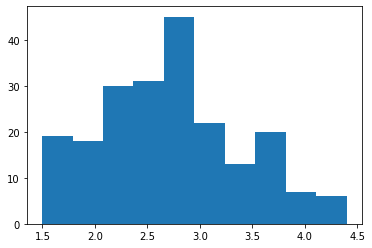

In [522]:
print(predDF.quantile([0.25,0.5,0.75]))


plt.hist(predDF)
plt.show()

# set 2.201840 as cutoff

## Analyze Results 

Using the cutoff value calculated above, use the testing sets to determine the predicted liked/disliked categorizations vs. the actual ones. 

In [523]:
# 0 = dislike, 1 = like
X_test_result = []

predlist = predDF[0].tolist()

for i in range(len(predlist)):
    if predlist[i] > 2.201840:
        X_test_result.append(1)
    else:
        X_test_result.append(0)
        

        
y_test_result = []


y_test = y_test.tolist()
#y_test = y_test[0]


for i in range(len(y_test)):
    if y_test[i][0] > 2:
        y_test_result.append(1)
    else:
        y_test_result.append(0)

Use confusion matrix and precision/recall to evaluate the results of this model.

In [524]:
confusion = metrics.confusion_matrix(y_test_result, X_test_result)
print(confusion)

[[ 37 115]
 [ 16  43]]


In [525]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# use float to perform true division, not integer division
print("Accuracy = ", (TP + TN) / float(TP + TN + FP + FN))

sensitivity = TP / float(FN + TP)
print("sensitivity = ",sensitivity)

specificity = TN / (TN + FP)

print("specificity = ",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate = ",false_positive_rate)

precision = TP / float(TP + FP)

print("precision = ", precision)

print("recall = ", sensitivity)


Accuracy =  0.3791469194312796
sensitivity =  0.7288135593220338
specificity =  0.24342105263157895
false_positive_rate =  0.756578947368421
precision =  0.2721518987341772
recall =  0.7288135593220338
